In [85]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2_score
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt 


%matplotlib inline


In [86]:
TEST_origin = './test.csv'
TRAIN_origin = './train.csv'

In [87]:
train_df = pd.read_csv(TRAIN_origin)
test_df = pd.read_csv(TEST_origin) 
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [88]:
test_df = pd.read_csv(TEST_origin) 
test_df.tail()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [90]:
train_df['DistrictID'] = train_df['DistrictId'].astype(str)

### Обзор данных


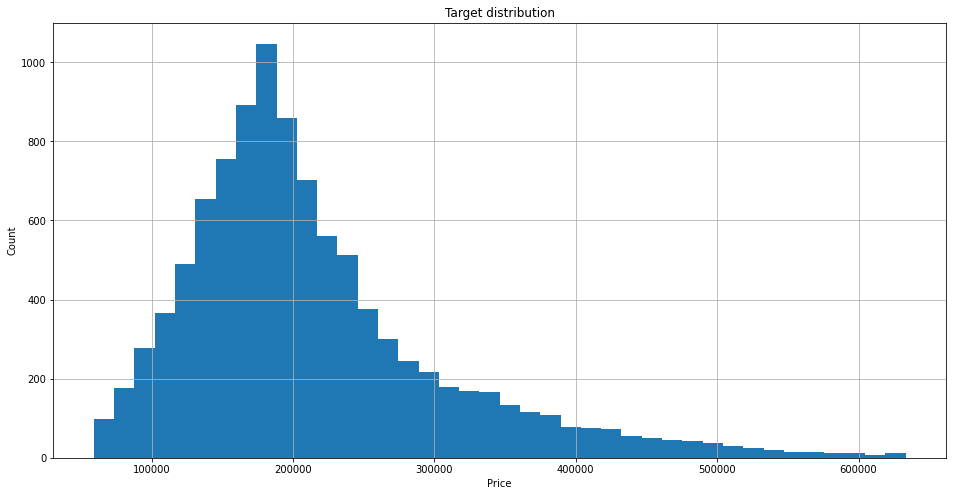

In [91]:
plt.figure (figsize=(16,8))
train_df['Price'].hist(bins = 40)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title ('Target distribution')
plt.show()

### Количественные переменные

In [92]:
train_df.describe()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Качественные переменные.

In [93]:
train_df.select_dtypes(include='object').columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Ecology_2', 'Ecology_3', 'Shops_2', 'DistrictID'], dtype='object')>

In [94]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [95]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [96]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [97]:
train_df['DistrictID'].value_counts()


27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictID, Length: 205, dtype: int64

### Обработка выбросов


##### Rooms

In [98]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [99]:
median = train_df['Rooms'].median()
train_df.loc[train_df['Rooms'].isin ([0,10,19]),'Rooms'] = median
median_2 = train_df['Rooms'].median()
train_df.loc[train_df['Rooms']>6,'Rooms'] = median_2

In [100]:
test_df.loc[test_df['Rooms']>6,'Rooms'] = median_2

#### Square LifeSquare KitchenSquare

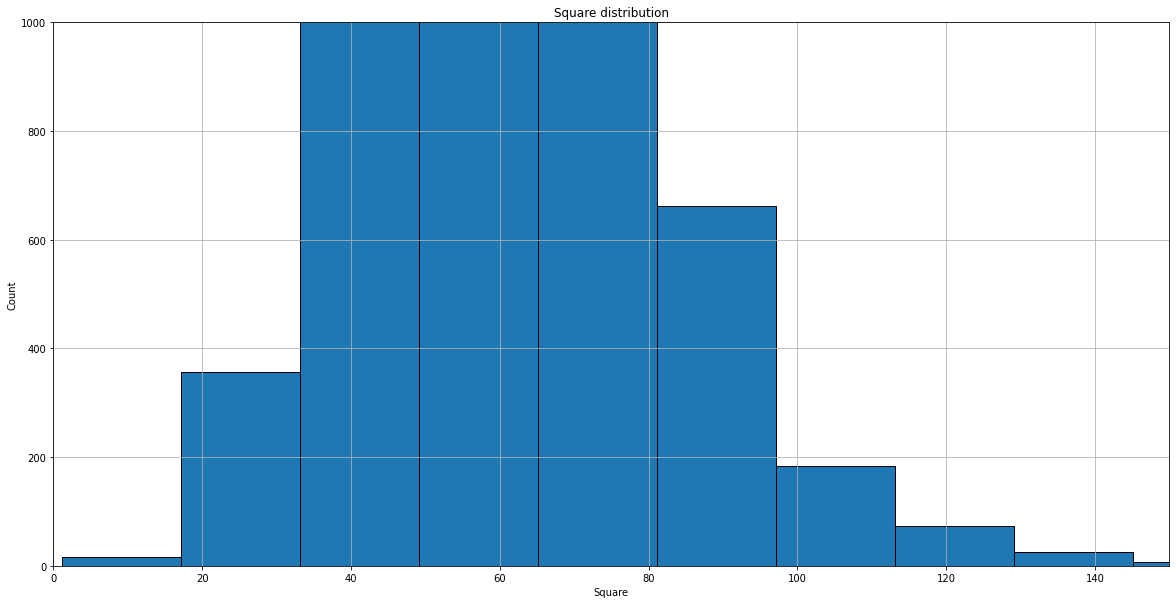

In [101]:
# train_df['Square'].value_counts()
plt.figure (figsize=(20,10))
plt.axis([0,150,0,1000])
train_df['Square'].hist(bins = 40, edgecolor = 'black')
# train_df['LifeSquare'].hist(bins = 40, edgecolor = 'black')
# train_df['KitchenSquare'].hist(bins = 40, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Square')

plt.title ('Square distribution')
# print(hist_info)
plt.show()

По гистограмме видно, что основное количество площадей распределено в диапозоне от 25 до 120 метров.

In [102]:
train_df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [103]:
train_df[train_df['Square']>120].shape

(92, 21)

In [104]:
train_df[train_df['Square']<25].shape

(34, 21)

In [105]:
# mode_sq = train_df['Square'].mode()
train_df.loc[train_df['Square']>120,'Square'] = 120
train_df.loc[train_df['Square']<25,'Square'] = 25

In [106]:
# train_df['Square'] = train_df.loc[(train_df['Square'] < 125)|(train_df['Square']>25)]

In [107]:
# проверяем насколько изменились значения выборки
train_df['Square'].describe()

count    10000.000000
mean        56.025251
std         18.156024
min         25.000000
25%         41.774881
50%         52.513310
75%         65.900625
max        120.000000
Name: Square, dtype: float64

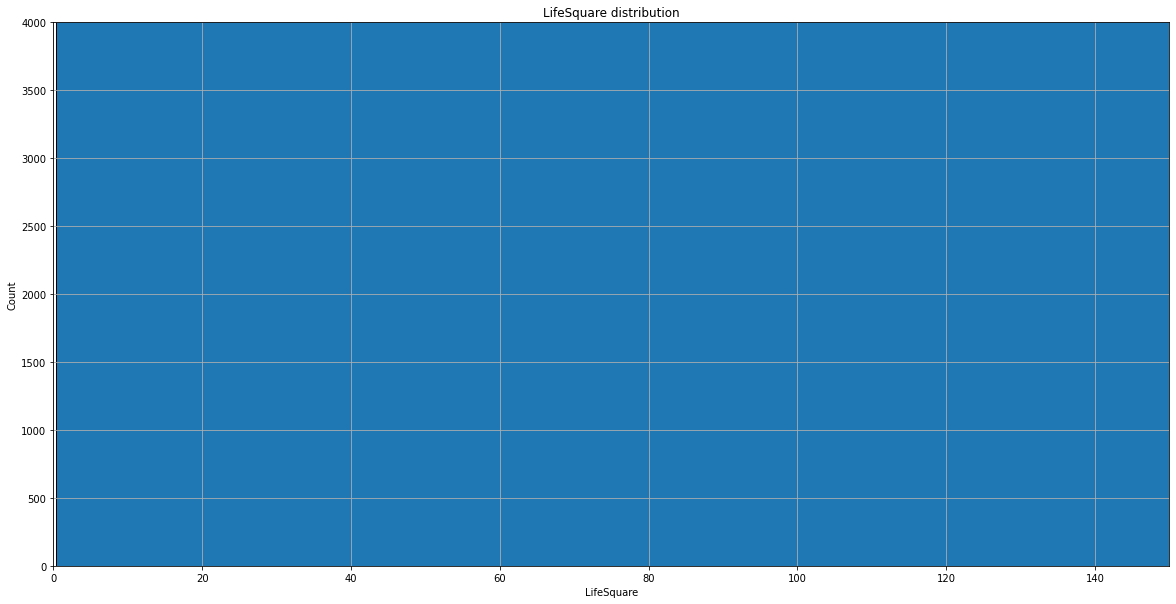

In [108]:
# LifeSquare
plt.figure (figsize=(20,10))
plt.axis([0,150,0,4000])

train_df['LifeSquare'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('LifeSquare')

plt.title ('LifeSquare distribution')
# print(hist_info)
plt.show()

In [109]:

train_df['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [110]:
mean_lsq = train_df['LifeSquare'].mean()
train_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare']= 0
mean_lsq

37.199644827673154

In [111]:
train_df[train_df['LifeSquare']>80].shape

(210, 21)

In [112]:
train_df.loc[train_df['LifeSquare']>80,'LifeSquare'] = 80

In [113]:
train_df.loc[train_df['LifeSquare']== 0,'LifeSquare'] = mean_lsq


In [114]:
train_df[train_df['LifeSquare']<15].shape


(247, 21)

In [115]:
train_df.loc[train_df['LifeSquare']<15,'LifeSquare'] = 12

In [116]:
# проверяем насколько изменились значения выборки
train_df['LifeSquare'].describe()

count    10000.000000
mean        36.126559
std         13.904312
min         12.000000
25%         25.527399
50%         37.199645
75%         41.427234
max         80.000000
Name: LifeSquare, dtype: float64

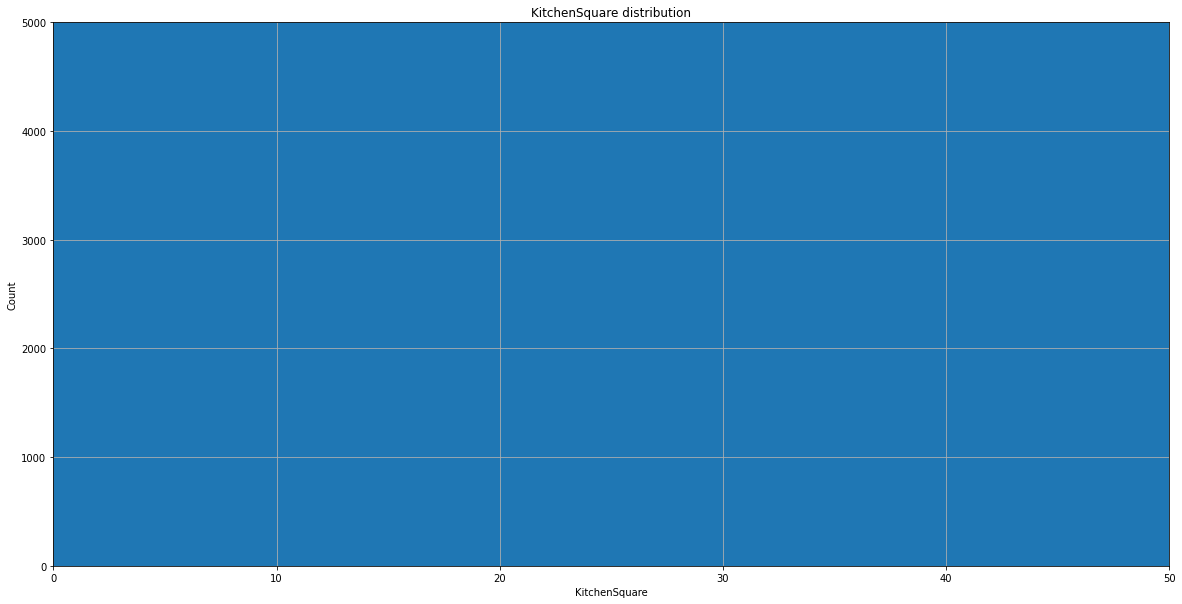

In [117]:
# KitchenSquare
plt.figure (figsize=(20,10))
plt.axis([0,50,0,5000])

train_df['KitchenSquare'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('KitchenSquare')

plt.title ('KitchenSquare distribution')
# print(hist_info)
plt.show()

In [118]:
train_df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [119]:
train_df[train_df['KitchenSquare']>20].shape

(48, 21)

In [120]:
train_df.loc[train_df['KitchenSquare']>20,'KitchenSquare'] = 30

In [121]:
# проверяем насколько изменились значения выборки
train_df['KitchenSquare'].describe()

count    10000.000000
mean         5.790900
std          4.223667
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max         30.000000
Name: KitchenSquare, dtype: float64

### Floor

In [122]:
train_df['Floor'].describe()

count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64

In [123]:
median_fl = train_df['Floor'].median()
train_df.loc[train_df['Floor']== 0,'Floor'] = median_fl

In [124]:
train_df['Floor'].describe()

count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64

### HouseFloor

In [125]:
train_df['HouseFloor'].describe()

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

In [126]:
mode_hfl = train_df['HouseFloor'].mode()
train_df.loc[train_df['HouseFloor']== 0,'HouseFloor'] = mode_hfl

In [127]:
train_df['HouseFloor'].describe()

count    9731.000000
mean       12.957969
std         6.531919
min         1.000000
25%         9.000000
50%        14.000000
75%        17.000000
max       117.000000
Name: HouseFloor, dtype: float64

### HouseYear

In [128]:
train_df['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [129]:
mode_hy = train_df['HouseYear'].mode()
train_df.loc[train_df['HouseYear']== 0,'HouseYear'] = mode_hy
train_df.loc[train_df['HouseYear']<1970,'HouseYear'] = mode_hy
train_df.loc[train_df['HouseYear']>2005,'HouseYear'] = mode_hy

### Social

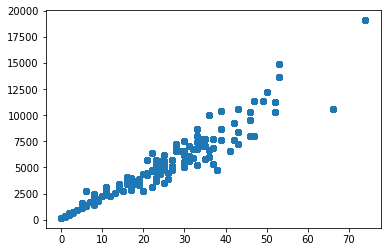

In [130]:
import matplotlib.pyplot as plt 
# plt.scatter(train_df['Social_2'],train_df['Social_2'])
# plt.scatter(train_df['Social_1'],train_df['Social_3'])
plt.scatter(train_df['Social_1'],train_df['Social_2'])

In [131]:
social_df = train_df.loc[:,'Social_1':'Social_2' ]
social_df.head()

,Social_1,Social_2
0,11,3097
1,30,6207
2,33,5261
3,1,264
4,33,8667


In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
social_df_ckld = scaler.fit_transform(social_df)

In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components =1)
pca_social = pca.fit_transform(social_df_ckld)
pca_social
pca.explained_variance_ratio_

array([0.97799423])

In [134]:
train_df['Social_3'].describe()

count    10000.000000
mean         8.039200
std         23.831875
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max        141.000000
Name: Social_3, dtype: float64